# Домашнее задание 7. Визуализация данных

Вся работа состоит из трех больших блоков:

- Базовые операции с датафреймами
- Вычисление новых признаков и группировка данных
- Визуализация данных

**Авторские подсказки**

Во многих заданиях вам даны авторские подсказки - результат выполнения авторского кода для решения этой задачи. Они вам даны просто для понимания, в правильном ли направлении вы идете. Формат вывода вашего кода не обязательно должен совпадать с форматом в подсказках. Ячейки с ответом изменять не рекомендуется - проводите эксперименты в новых.


# Описание задачи

**Задача кредитного скоринга** - одна из наиболее популярных областей в банковской индустрии, где применяется анализ данных

Признаки клиентов банка:

- ```age``` - возраст (вещественный)
- ```MonthlyIncome``` - месячный доход (вещественный)
- ```DebtRatio``` - Debt-to-income Ratio (вещественный)
- ```NumberOfOpenCreditLinesAndLoans``` - число заемов и кредитных линий
- ```NumberRealEstateLoansOrLines``` - число ипотек и заемов, связанных с недвижимостью (натуральное число)
- ```NumberOfDependents``` - число членов семьи, которых содержит клиент, исключая самого клиента (натуральное число)
- ```defaulted``` - выплачен или не выплачен в конечном итоге кредит заемщиком

В этой работе мы будем исследовать данные о заемщиках и научимся отвечать на вопросы о предоставленных нам данных.

# Базовые операции с датафреймами

## Задача 1

Скачайте набор данных:

In [ ]:
!gdown 1Y327Wvlw1GVY1SSTJ4g6DuTujCFc5TsH

"gdown" не является внутренней или внешней
командой, исполняемой программой или пакетным файлом.


Считайте файл ```credit_data.csv``` в переменную ```df```:

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('credit_data.csv')
df

,defaulted,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents
0,1,45,0.802982,9120.0,13,6,2.0
1,0,40,0.121876,2600.0,4,0,1.0
2,0,38,0.085113,3042.0,2,0,0.0
3,0,30,0.036050,3300.0,5,0,0.0
4,0,49,0.024926,63588.0,7,1,0.0
...,...,...,...,...,...,...,...
149995,0,74,0.225131,2100.0,4,1,0.0
149996,0,44,0.716562,5584.0,4,1,2.0
149997,0,58,3870.000000,NaN,18,1,0.0
149998,0,30,0.000000,5716.0,4,0,0.0


Определите размер таблицы:

In [ ]:
df.shape

(150000, 7)

```(150000, 7)```

Посмотрите первые пять строк:

In [ ]:
df.head(5)

,defaulted,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents
0,1,45,0.802982,9120.0,13,6,2.0
1,0,40,0.121876,2600.0,4,0,1.0
2,0,38,0.085113,3042.0,2,0,0.0
3,0,30,0.036050,3300.0,5,0,0.0
4,0,49,0.024926,63588.0,7,1,0.0


Выведите список названий столбцов:

In [ ]:
df.columns

Index(['defaulted', 'age', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberRealEstateLoansOrLines',
       'NumberOfDependents'],
      dtype='object')

```
['defaulted',
 'age',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberRealEstateLoansOrLines',
 'NumberOfDependents']
 ```

## Задача 2

Определите число пропусков в каждом столбце (могут пригодиться методы ```isnull``` и ```sum```):

In [ ]:
df.isnull().sum()

defaulted                              0
age                                    0
DebtRatio                              0
MonthlyIncome                      29731
NumberOfOpenCreditLinesAndLoans        0
NumberRealEstateLoansOrLines           0
NumberOfDependents                  3924
dtype: int64


```
defaulted                              0
age                                    0
DebtRatio                              0
MonthlyIncome                      29731
NumberOfOpenCreditLinesAndLoans        0
NumberRealEstateLoansOrLines           0
NumberOfDependents                  3924
dtype: int64
```



Определите долю пропусков в каждом столбце (могут пригодиться методы ```isnull``` и ```mean```):

In [ ]:
df.isnull().mean()

defaulted                          0.000000
age                                0.000000
DebtRatio                          0.000000
MonthlyIncome                      0.198207
NumberOfOpenCreditLinesAndLoans    0.000000
NumberRealEstateLoansOrLines       0.000000
NumberOfDependents                 0.026160
dtype: float64

```
defaulted                          0.000000
age                                0.000000
DebtRatio                          0.000000
MonthlyIncome                      0.198207
NumberOfOpenCreditLinesAndLoans    0.000000
NumberRealEstateLoansOrLines       0.000000
NumberOfDependents                 0.026160
dtype: float64
```

## Задача 3

Определите долю заемщиков, которые не выплатили кредит (колонка ```defaulted```):

In [ ]:
df['defaulted'].mean()


0.06684

```0.06684```

## Задача 4

Определите количество заемщиков, у которых ежемесячный доход ```MonthlyIncome``` выше среднего:

In [ ]:
df.head(5)
sredn = df['MonthlyIncome'].mean()
sredn
df[df['MonthlyIncome']>sredn].shape[0]

44146

```44146```

## Задача 5

Вычислите медианный возраст заемщиков, которые не вернули кредит (```defaulted=1```):

In [ ]:
a=df[df['defaulted'] ==1]
a
a['age'].median()

45.0

```45.0```

Проверьте, больше ли он или меньше медианного возраста всех заемщиков:

In [ ]:
df['age'].median()
#медианный возраст заемщиков, которые не вернули кредит (defaulted=1)< медианного возраста всех заемщиков

52.0

## Задача 6

Вычислите сколько заемщиков старше 40 лет имеют ежемесячный доход больше среднего ежемесячного дохода по всей выборке:

In [ ]:
sredn = df['MonthlyIncome'].mean()
starsh = df[df['age']>40]
starsh[starsh['MonthlyIncome']>sredn].shape[0]

37629

```37629```

# Вычисление новых признаков и группировка данных

## Задача 7

Вычислите новый признак ```age_group``` на основе признака ```age```, который разбивает заемщиков на 3 возрастные группы:
- до 30 лет включительно (операция ```<=```) - **группа 1**
- от 30 лет не включительно и до 50 лет включительно - **группа 2**
- строго старше 50 лет - **группа 3**

Для этого заведите отдельную функцию `calculate_age_group` и передайте ее в метод `apply`, который позовете от столбца `age`:

In [ ]:
def calculate_age_group(column):
    if column <=30:
        return 1
    elif 30<column<=50:
        return 2
    else:
        return 3

df['age'].apply(calculate_age_group)
df['age_group'] = df['age'].apply(calculate_age_group)
df.head(5)

,defaulted,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents,age_group
0,1,45,0.802982,9120.0,13,6,2.0,2
1,0,40,0.121876,2600.0,4,0,1.0,2
2,0,38,0.085113,3042.0,2,0,0.0,2
3,0,30,0.036050,3300.0,5,0,0.0,1
4,0,49,0.024926,63588.0,7,1,0.0,2


## Задача 8

Вычислите количество заемщиков в каждой группе нового вычисленного признака `age_group` с помощью метода `value_counts`:

In [ ]:
df['age_group'].value_counts()

3    79866
2    59376
1    10758
Name: age_group, dtype: int64

```
3    79866
2    59376
1    10758
Name: age_group, dtype: int64
```

## Задача 9

Посчитайте долю заемщиков, которые не вернули кредит, в каждой из вычисленных возрастных групп (группировка по возрастной группе и применение метода `mean` к колонке `defaulted`):

In [ ]:
df.groupby('age_group')['age_group'].count()
group1 = df[(df['age_group'] ==1) & (df['defaulted'] ==1)]
group1
group1 = df[df['age_group'] ==1]
group1['defaulted'].mean()


0.11563487637107268

In [ ]:
df.groupby('age_group')['defaulted'].mean()

age_group
1    0.115635
2    0.088975
3    0.043811
Name: defaulted, dtype: float64

## Задача 10

Визуализируйте полученные данные в виде гистограммы. Добавьте сетку на график, дайте графику название:

In [ ]:
# Импортируем модуль для визуализации данных
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
np.array(df.groupby('age_group')['defaulted'].mean())

array([0.11563488, 0.08897534, 0.04381088])

In [ ]:
uf = pd.DataFrame(data = [0.11563488, 0.08897534, 0.04381088],
                 index = ['1','2','3'])
uf

,0
1,0.115635
2,0.088975
3,0.043811


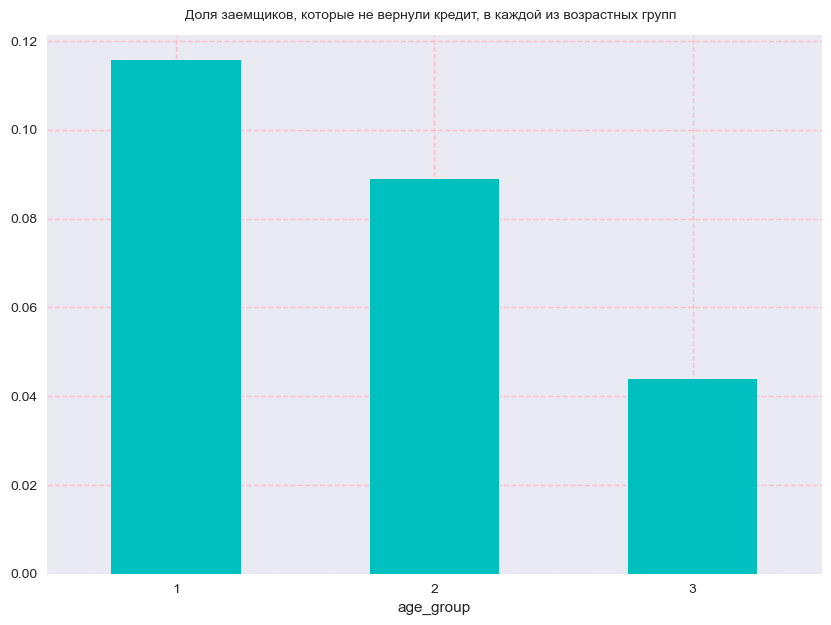

In [ ]:
df.groupby('age_group')['defaulted'].mean().plot(kind='bar',figsize=(10,7),color='c')

plt.text(
    0.035,
    0.125,
    'Доля заемщиков, которые не вернули кредит, в каждой из возрастных групп')
plt.grid(linestyle='--', color='pink')
plt.xticks(rotation = 360)
plt.show()


## Задача 11

Какие выводы вы можете сделать? С увеличением возраста заемщика риск невозврата кредита становится больше или меньше? Дайте ответ на вопрос в текстовой ячейке ниже:

**Ответ:**

In [ ]:
# С увеличением возраста риск невозврата кредита падает

## Задача 12

Вычислите новый признак `alone_and_poor`, который равен `1` у заемщиков, которые не содержат никого, кроме себя (`NumberOfDependents == 0`) и у которых месячный доход (`MonthlyIncome`) меньше 10% квантили по этому признаку среди всех заемщиков. Иначе этот признак сделайте равным 0.

Для этого напишите функцию `calculate_alone_and_poor`, в которой вы будете принимать строку, доставать нужные поля у этой строки, и проверять перечисленные выше условия.

Заранее посчитайте значение 10% квантили по столбцу `MonthlyIncome`, и передайте это значение в функцию как аргумент по-умолчанию.

Затем полученную функцию примените ко всему датафрейму с помощью метода `apply`. Не забудьте указать параметр `axis=1` в методе `apply` (применять переданную функцию ко строкам), иначе код упадет с ошибкой.

In [ ]:
quantile_10 = df['MonthlyIncome'].quantile(0.1)
print( "квантиль = ", quantile_10)

квантиль =  2005.0


In [ ]:
def calculate_alone_and_poor(row, quantile_10):
    if row['NumberOfDependents'] == 0 and row['MonthlyIncome'] < quantile_10:
        return 1
    else:
        return 0

In [ ]:
# Применяем функцию ко всему датафрейму
df['alone_and_poor'] = df.apply(calculate_alone_and_poor, quantile_10=quantile_10, axis=1)

print(df.head())

   defaulted  age  DebtRatio  MonthlyIncome  NumberOfOpenCreditLinesAndLoans  \
0          1   45   0.802982         9120.0                               13   
1          0   40   0.121876         2600.0                                4   
2          0   38   0.085113         3042.0                                2   
3          0   30   0.036050         3300.0                                5   
4          0   49   0.024926        63588.0                                7   

   NumberRealEstateLoansOrLines  NumberOfDependents  age_group  alone_and_poor  
0                             6                 2.0          2               0  
1                             0                 1.0          2               0  
2                             0                 0.0          2               0  
3                             0                 0.0          1               0  
4                             1                 0.0          2               0  


Сколько получилось людей с признаком ```alone_and_poor``` равным 1?

In [ ]:
df[df['alone_and_poor']==1].shape[0]

8719

# Визуализация данных

## Задача 13

Постройте гистограмму распределения возрастов всех заемщиков. Для этого вам может понадобиться метод `plot.hist()`. Обратите внимание, что у метода `hist()` есть параметр `bins`, который отвечает за мелкость разбиения гистограммы. Постройте два отдельных графика с параметрами `bins=10` и `bins=30`.

Подпишите оси, добавьте сетку на графики, дайте графикам название.

Также не забывайте, что чтобы картинка отрисовалась корректно, нужно последней строкой кода написать `plt.show()`.

In [ ]:
from matplotlib import pyplot as plt

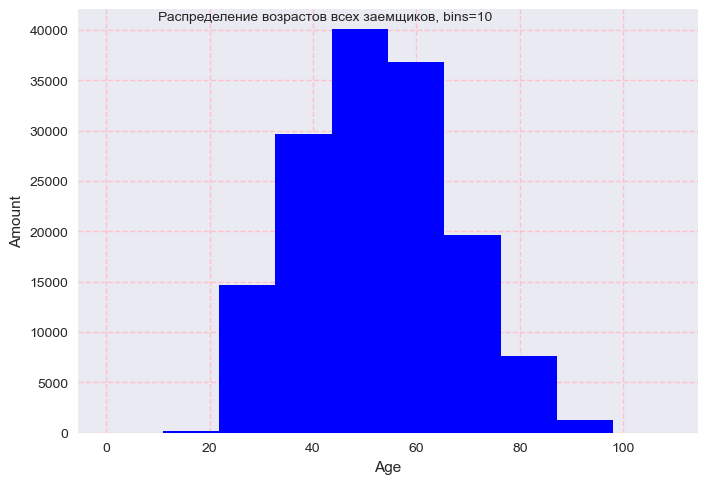

In [ ]:
df['age'].plot.hist(bins=10, color='b')
plt.text(
    10,
    41000,
    'Распределение возрастов всех заемщиков, bins=10')
plt.grid(linestyle='--', color='pink')
plt.xticks(rotation = 360)
plt.xlabel("Age")
plt.ylabel("Amount")
plt.show()


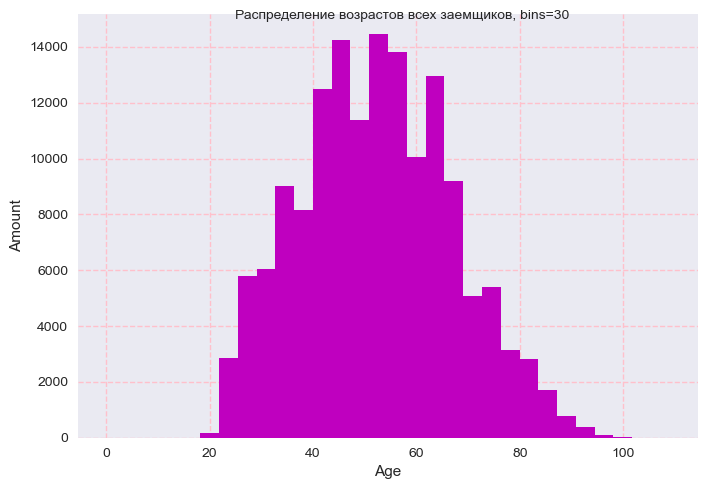

In [ ]:
df['age'].plot.hist(bins=30, color='m')
plt.text(
    25,
    15000,
    'Распределение возрастов всех заемщиков, bins=30')
plt.grid(linestyle='--', color='pink')
plt.xticks(rotation = 360)
plt.xlabel("Age")
plt.ylabel("Amount")
plt.show()

## Задача 14

Теперь постройте гистограмму распределения числа открытых кредитных линий (`NumberOfOpenCreditLinesAndLoans`) с помощью функции `distplot()` из модуля `seaborn`.

Подпишите оси, добавьте сетку на графики, дайте графику название:

In [ ]:
import seaborn as sns

C:\Users\adamc\AppData\Local\Temp\ipykernel_13464\2809586751.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['NumberOfOpenCreditLinesAndLoans'])


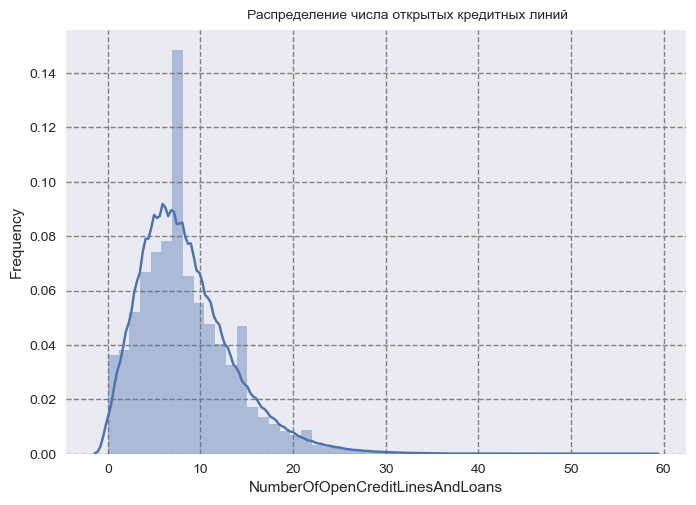

In [ ]:
sns.distplot(df['NumberOfOpenCreditLinesAndLoans'])
plt.grid(linestyle='--', color='grey')
plt.xlabel("NumberOfOpenCreditLinesAndLoans")
plt.ylabel("Frequency")
plt.text(
    15,
    0.16,
    'Распределение числа открытых кредитных линий')
plt.show()

## Задача 15

Постройте гистограмму распределения признака `NumberOfDependents` для заемщиков, которые успешно вернули кредит (`defaulted = 0`).

Подпишите оси, добавьте сетку на графики, дайте графику название:

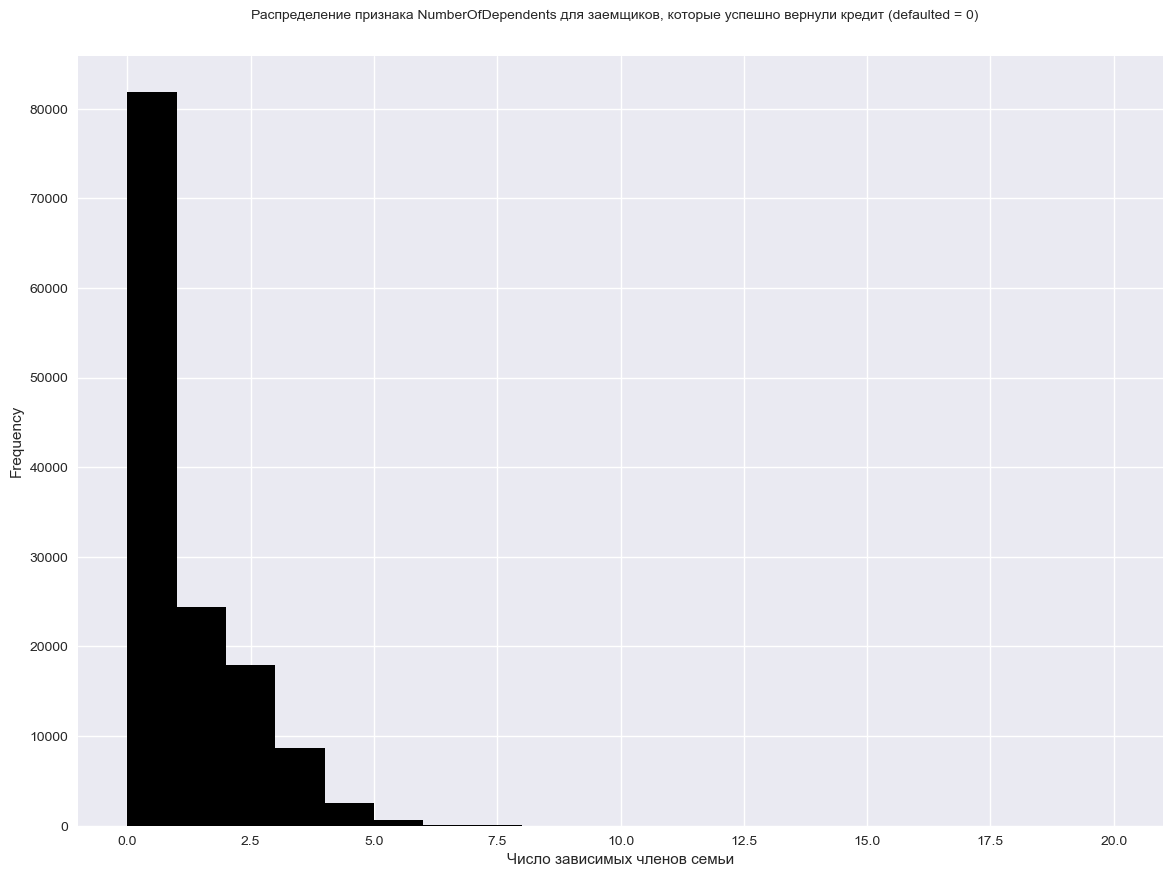

In [ ]:
a = df[df['defaulted'] ==0]
a['NumberOfDependents'].plot.hist(bins =20,color='black',figsize=(14, 10))
plt.xlabel("Число зависимых членов семьи")
plt.text(
    2.5,
    90000,
    'Распределение признака NumberOfDependents для заемщиков, которые успешно вернули кредит (defaulted = 0)')
plt.show()

## Задача 16

Вычислите среднее значение признака `NumberOfDependents` для каждого возраста

---

(`groupby` по возрасту и `mean` от столбца `NumberOfDependents`) и постройте гистограмму распределения полученных значений (`plot.bar()`).

Сделайте график покрупнее, например 14 на 10 дюймов с помощью параметра `figsize`.

Подпишите оси, добавьте сетку на графики, дайте графику название.

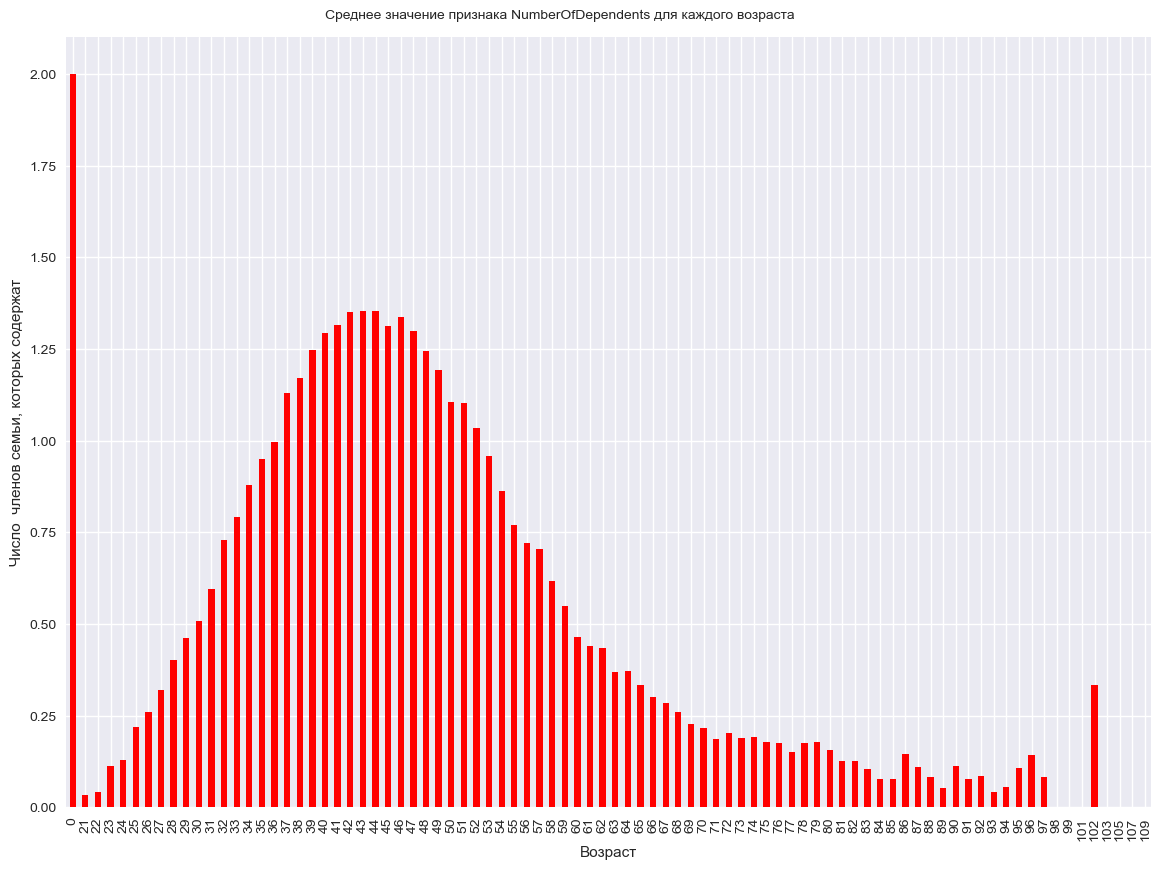

In [ ]:
df.groupby('age')['NumberOfDependents'].mean().plot.bar(figsize=(14, 10),color='r')
plt.xlabel("Возраст")
plt.ylabel("Число  членов семьи, которых содержат")
plt.text(
    20,
    2.15,
    'Среднее значение признака NumberOfDependents для каждого возраста')
plt.show()

## Задача 17

Видите ли вы теперь какие-то аномалии в данных? Определите, что это за аномалии, и очистите данные от этих аномалий. Затем снова постройте такой же график, как в предыдущем задании, только уже на датафрейме с очищенными выбросами:

In [ ]:
#df[df['age']==0]
#df[df['age']==102]

,defaulted,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents,age_group
25561,0,102,0.002424,3300.0,3,0,0.0,3
90937,0,102,0.000000,NaN,12,0,0.0,3
96450,0,102,0.273844,3417.0,7,0,1.0,3


In [ ]:
df = df[(df.age != 0 ) & (df.age != 102 )]
df

,defaulted,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents,age_group
0,1,45,0.802982,9120.0,13,6,2.0,2
1,0,40,0.121876,2600.0,4,0,1.0,2
2,0,38,0.085113,3042.0,2,0,0.0,2
3,0,30,0.036050,3300.0,5,0,0.0,1
4,0,49,0.024926,63588.0,7,1,0.0,2
...,...,...,...,...,...,...,...,...
149995,0,74,0.225131,2100.0,4,1,0.0,3
149996,0,44,0.716562,5584.0,4,1,2.0,2
149997,0,58,3870.000000,NaN,18,1,0.0,3
149998,0,30,0.000000,5716.0,4,0,0.0,1


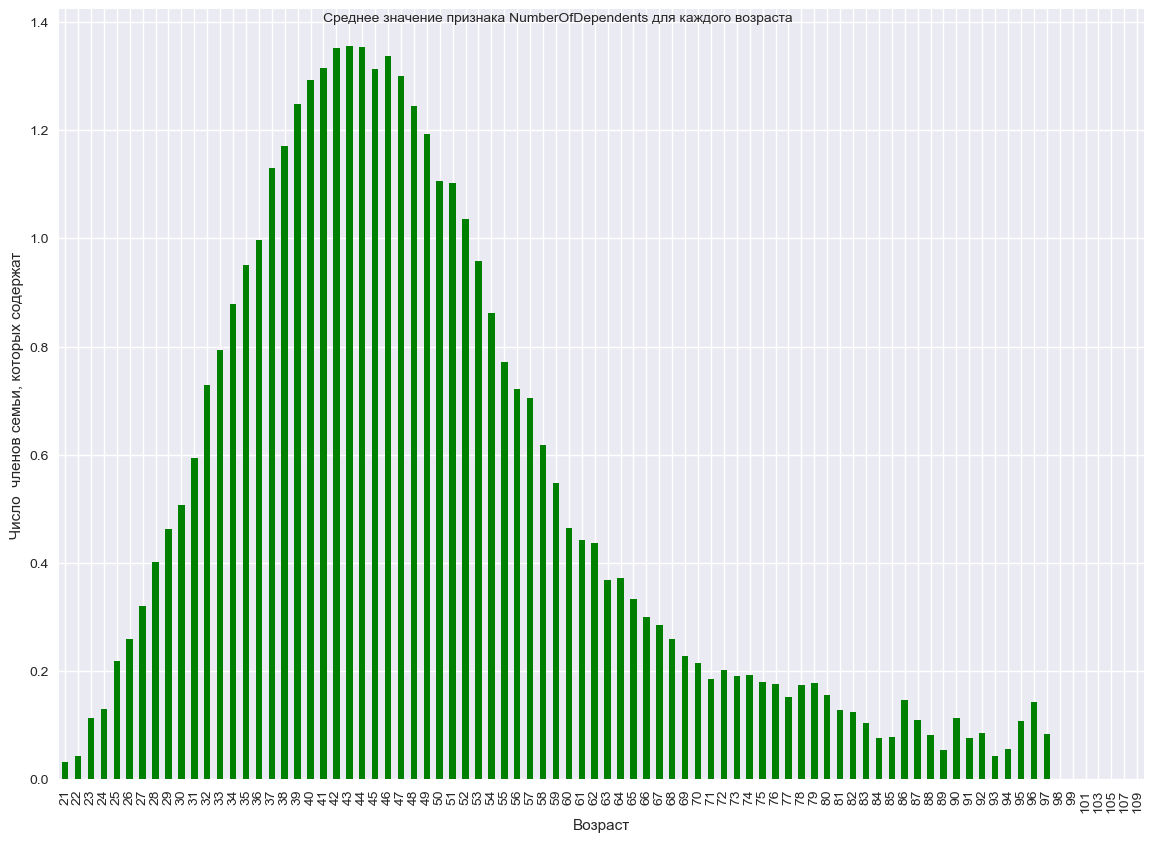

In [ ]:
df.groupby('age')['NumberOfDependents'].mean().plot.bar(figsize=(14, 10),color='g')
plt.xlabel("Возраст")
plt.ylabel("Число  членов семьи, которых содержат")
plt.text(
    20,
    1.4,
    'Среднее значение признака NumberOfDependents для каждого возраста')
plt.show()